In [1]:
!pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1239 sha256=247a8411230ae53bc8c6e37211d1ddde58f9a7c1136f8d54562a8362f6c75683
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [2]:
!pip install python_speech_features 

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=fef595c1018e042c494e8965042f105f2710ce9f0eb4c7172004bcc4b5117676
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [3]:
!pip install pipwin

     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 1.0 MB 48.5 MB/s 
  Created wheel for pipwin: filename=pipwin-0.5.1-py2.py3-none-any.whl size=8792 sha256=15b1fce76ca67911699c61cbab31fdbbf1240028b11e90234176ea9ca229c0f7
  Stored in directory: /root/.cache/pip/wheels/4e/f2/06/9024048eece9a22afc7a013395d6de2d345f56185095550d4c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=26001 sha256=0b4bb9b8464a076e72c902b040d04b429d4b103bfed2b436c5c212422ebdddb3
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5afbda6a1ab7935bbce314969da
Successfully built pipwin pyjsparser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (323 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155219 files and directories currently installed.)
Preparing to 

In [5]:
!pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52611 sha256=9f404ce713f6248b30a251d020fcda2d60ad983c90807a5197f5bc2b99b73049
  Stored in directory: /root/.cache/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built pyaudio


In [6]:
!pip install noisereduce

In [7]:
!pip install speech-recognition-fork

     |████████████████████████████████| 32.8 MB 58 kB/s 


In [32]:
#Install all the Reqiuired Libraries and Packages 
import os 
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [33]:
#Loading the required RAVDESS DataSet with length of 1440 Audio Files 
os.listdir(path='/content/drive/MyDrive/speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1439

In [ ]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

In [34]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

In [ ]:
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

In [ ]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [35]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [36]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
for file in tqdm(glob.glob(r'/content/drive/MyDrive/speech-emotion-recognition-ravdess-data//**/*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/Clean_Speech//'+str(file_name), rate=rate,data=signal[mask])

100%|██████████| 1439/1439 [11:26<00:00,  2.10it/s]


In [37]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [38]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [71]:
#Load the data and extract features for each sound file
from glob import glob
import os
import glob
def load_data(test_size=0.1):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'/content/drive/MyDrive/Clean_Speech/*'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [72]:
#Split the dataset
import librosa
import numpy as np
x_train,x_test,y_train,y_test=load_data(test_size=0.1)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(691, 180) (77, 180) (691, 2) (77, 2)
(691,) (77,)
03-01-06-02-02-02-05.wav
03-01-02-02-02-02-19.wav
03-01-02-02-02-02-11.wav
03-01-02-01-01-01-15.wav
03-01-07-01-01-02-11.wav
03-01-02-02-02-02-23.wav
03-01-03-02-01-01-09.wav
03-01-06-01-01-01-03.wav
03-01-06-01-01-02-23.wav
03-01-06-01-01-01-06.wav
03-01-02-02-01-01-16.wav
03-01-02-01-01-01-05.wav
03-01-06-01-01-02-08.wav
03-01-02-01-01-02-23.wav
03-01-06-01-01-02-24.wav
03-01-07-02-01-01-21.wav
03-01-06-02-02-02-02.wav
03-01-03-02-01-02-09.wav
03-01-06-01-01-02-22.wav
03-01-02-01-02-01-03.wav
03-01-03-02-02-02-15.wav
03-01-02-02-01-01-01.wav
03-01-06-01-02-01-18.wav
03-01-07-02-01-02-03.wav
03-01-02-01-02-01-16.wav
03-01-06-02-01-01-04.wav
03-01-06-02-01-01-19.wav
03-01-06-01-01-01-20.wav
03-01-03-02-02-02-24.wav
03-01-03-02-02-02-19.wav
03-01-02-02-01-01-23.wav
03-01-06-01-01-01-12.wav
03-01-02-01-02-02-13.wav
03-01-07-01-01-02-19.wav
03-01-07-01-01-02-23.wav
03-01-03-02-02-01-14.wav
03-01-07-01-01-02-08.wav
03-01-07-01-02-01-12.wav

In [73]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(array([-3.86344238e+02,  6.09063416e+01, -3.01394367e+01,  1.13427353e+01,
       -2.36910629e+01, -1.43559656e+01, -3.23676567e+01, -2.80847073e+01,
       -1.09371166e+01, -1.68263931e+01, -6.30211115e+00, -2.67360363e+01,
       -5.45562935e+00, -1.27265081e+01, -2.36432648e+01, -6.92295361e+00,
       -1.31441565e+01, -1.62244587e+01, -7.51474047e+00, -3.08752728e+00,
       -6.95668554e+00,  2.97044373e+00,  3.26372385e-01,  1.24864924e+00,
       -1.38225353e+00, -4.08523411e-01,  9.19907856e+00,  1.54340572e+01,
        9.61527443e+00,  5.08328581e+00,  1.70945942e+00,  6.66152620e+00,
        5.40964746e+00,  6.67300177e+00, -2.66441852e-01, -1.89593458e+00,
        1.13295722e+00, -3.97149324e-01, -4.09819698e+00, -1.12877309e+00,
        4.21118140e-01,  5.48758388e-01,  5.30478954e-01,  4.69171941e-01,
        5.13857901e-01,  5.87624371e-01,  4.79016364e-01,  5.16669154e-01,
        6.23308659e-01,  6.17032528e-01,  5.32242119e-01,  4.30788696e-01,
        1.19038168e-05, 

In [74]:

# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [75]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [80]:

#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "SK83.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [81]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Emotion_Voice_Detection_Model = pickle.load(file)

Emotion_Voice_Detection_Model

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [76]:
#predicting :
y_pred=model.predict(x_test)
y_pred

array(['happy', 'calm', 'calm', 'calm', 'fearful', 'calm', 'happy',
       'disgust', 'fearful', 'fearful', 'calm', 'calm', 'fearful', 'calm',
       'fearful', 'disgust', 'fearful', 'happy', 'fearful', 'calm',
       'happy', 'calm', 'disgust', 'disgust', 'calm', 'fearful', 'happy',
       'fearful', 'fearful', 'happy', 'fearful', 'fearful', 'calm',
       'disgust', 'disgust', 'happy', 'disgust', 'disgust', 'calm',
       'disgust', 'happy', 'disgust', 'fearful', 'disgust', 'calm',
       'happy', 'calm', 'fearful', 'disgust', 'fearful', 'happy', 'happy',
       'disgust', 'disgust', 'calm', 'disgust', 'fearful', 'fearful',
       'happy', 'disgust', 'fearful', 'happy', 'fearful', 'disgust',
       'fearful', 'disgust', 'disgust', 'fearful', 'happy', 'happy',
       'disgust', 'calm', 'happy', 'calm', 'happy', 'calm', 'disgust'],
      dtype='<U7')

In [63]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinalsk1.csv')

    predictions                file_names
0       fearful  03-01-03-02-01-01-14.wav
1          calm  03-01-02-01-01-02-22.wav
2          calm  03-01-02-01-01-01-04.wav
3          calm  03-01-07-01-01-01-20.wav
4       fearful  03-01-06-01-02-01-04.wav
..          ...                       ...
249        calm  03-01-02-02-01-02-16.wav
250        calm  03-01-02-01-01-01-02.wav
251        calm  03-01-02-01-01-02-21.wav
252     fearful  03-01-02-01-02-02-01.wav
253        calm  03-01-02-01-01-02-12.wav

[254 rows x 2 columns]


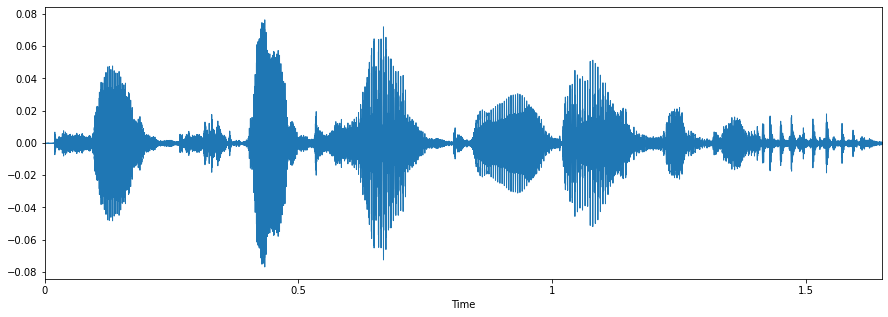

In [78]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('/content/drive/MyDrive/Clean_Speech/03-01-01-01-01-01-02.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = '/content/drive/MyDrive/Clean_Speech/03-01-01-01-01-01-02.wav'
# data , sr = librosa.load(file)
# data = np.array(data)
ans =[]
new_feature= extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
#data.shape


prediction=Emotion_Voice_Detection_Model.predict([ans[0]]) 
final_emotion=pd.DataFrame(prediction, columns = ['Emotion Prediction'])
final_emotion



,Emotion Prediction
0,calm


In [83]:
model.score(x_test,y_test)
output=model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output)

0.8311688311688312

In [85]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_test, output)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.12%
